In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def activate(x, func):
    if func == "tanh":
        return np.tanh(x)
    
    elif func == "sigmoid":
        return 1.0/(1.0+np.exp(-x))
    
    elif func == "none":
        return x
    
    else:
        return None
    
    
    
def activateDer(x, func):
    if func == "tanh":
        return 1 - x**2
    
    elif func == "sigmoid":
        return x*(1-x)
    
    elif func == "none":
        return np.ones(x.shape)
    
    else:
        return np.zeros(x.shape)
    
    
    
def MSE_der(tar, x):
    return 2*(x-tar)

def MSE(tar, x):
    return (x-tar)**2

def initWeights(rows, cols):
    return np.random.rand(rows, cols) * 2 - 1

def xavierInit(rows, cols, prevL=1, thisL=1):
    var = np.sqrt(2/(thisL + prevL))
    return (np.random.rand(rows, cols) * 2 - 1) * var

def printShape(ar1, ar2=np.zeros((0, 0)), ar3=np.zeros((0, 0)), ar4=np.zeros((0, 0))):
    print(ar1.shape, ar2.shape, ar3.shape, ar4.shape)
    
    
def fileToVector(filename, maxDim=26):
    outData = np.zeros((1, maxDim, 1))
    file = open(filename, 'r')
    for line in file:
        for c in line:
            if ord(c) >= ord('A') and abs(ord(c)-ord('A')) < maxDim:
                newChar = np.zeros((1, maxDim, 1))
                newChar[0][ord(c)-ord('A')][0] = 1
                outData = np.append(outData, newChar, axis=0)
            elif c == ' ':
                newChar = np.zeros((1, maxDim, 1))
                newChar[0][maxDim-1][0] = 1
                outData = np.append(outData, newChar, axis=0)
                
    return outData

def softmax(X):
    theta = 2
    ps = np.exp(X * theta)
    ps /= np.sum(ps)
    return ps


def vectorToLetter(inp, maxDim):
    output = ""
    for v in inp:
        indices = range(0, maxDim)
        index = getWeightedMax(v, 4)
        if index == maxDim-1:
            output += " "
        else:
            output += chr(ord('A') + index)
    return output

def getWeightedMax(prob, we=1):
    if np.sum(prob**we) == 0:
        return 0
    indices = range(0, len(prob))
    return np.random.choice(indices, p=((prob**we)/np.sum(prob**we)))

In [3]:
class Layer:
    
    def __init__(self, inp, out, lr):
        self.inputs = inp
        self.outputs = out
        self.learnRate = lr
        self.backpropSteps = 20
        
        N = out
        T = 1
        M = inp
        
        self.H = np.zeros((T, N, 1))
        self.Hc = np.zeros((T, N, 1))
        self.Z = np.zeros((T, N, 1))
        self.R = np.zeros((T, N, 1))
        self.X = np.zeros((T, M, 1))
        
        self.bh = xavierInit(N, 1, M, N)
        self.br = xavierInit(N, 1, M, N)
        self.bz = xavierInit(N, 1, M, N)
        
        self.Whh = xavierInit(N, N, M, N)
        self.Whz = xavierInit(N, N, M, N)
        self.Whr = xavierInit(N, N, M, N)
        
        self.Wxh = xavierInit(N, M, M, N)
        self.Wxr = xavierInit(N, M, M, N)
        self.Wxz = xavierInit(N, M, M, N)
        
        self.bhm = np.zeros((N, 1))
        self.brm = np.zeros((N, 1))
        self.bzm = np.zeros((N, 1))
        
        self.Whhm = np.zeros((N, N))
        self.Whzm = np.zeros((N, N))
        self.Whrm = np.zeros((N, N))
        
        self.Wxhm = np.zeros((N, M))
        self.Wxrm = np.zeros((N, M))
        self.Wxzm = np.zeros((N, M))
        
        self.bhv = np.zeros((N, 1))
        self.brv = np.zeros((N, 1))
        self.bzv = np.zeros((N, 1))
        
        self.Whhv = np.zeros((N, N))
        self.Whzv = np.zeros((N, N))
        self.Whrv = np.zeros((N, N))
       
        self.Wxhv = np.zeros((N, M))
        self.Wxrv = np.zeros((N, M))
        self.Wxzv = np.zeros((N, M))
        
        self.bhM = np.zeros((N, 1))
        self.brM = np.zeros((N, 1))
        self.bzM = np.zeros((N, 1))
        
        self.WhhM = np.zeros((N, N))
        self.WhzM = np.zeros((N, N))
        self.WhrM = np.zeros((N, N))
        
        self.WxhM = np.zeros((N, M))
        self.WxrM = np.zeros((N, M))
        self.WxzM = np.zeros((N, M))
        
        self.bhV = np.zeros((N, 1))
        self.brV = np.zeros((N, 1))
        self.bzV = np.zeros((N, 1))
        
        self.WhhV = np.zeros((N, N))
        self.WhzV = np.zeros((N, N))
        self.WhrV = np.zeros((N, N))
       
        self.WxhV = np.zeros((N, M))
        self.WxrV = np.zeros((N, M))
        self.WxzV = np.zeros((N, M))
        
    def clearMemory(self):
        
        N = self.outputs
        M = self.inputs
        
        self.H = np.zeros((1, self.outputs, 1))
        self.Hc = np.zeros((1, self.outputs, 1))
        self.Z = np.zeros((1, self.outputs, 1))
        self.R = np.zeros((1, self.outputs, 1))
        self.X = np.zeros((1, self.inputs, 1))
        self.bhm = np.zeros((N, 1))
        self.brm = np.zeros((N, 1))
        self.bzm = np.zeros((N, 1))        
        self.Whhm = np.zeros((N, N))
        self.Whzm = np.zeros((N, N))
        self.Whrm = np.zeros((N, N))        
        self.Wxhm = np.zeros((N, M))
        self.Wxrm = np.zeros((N, M))
        self.Wxzm = np.zeros((N, M))        
        self.bhv = np.zeros((N, 1))
        self.brv = np.zeros((N, 1))
        self.bzv = np.zeros((N, 1))        
        self.Whhv = np.zeros((N, N))
        self.Whzv = np.zeros((N, N))
        self.Whrv = np.zeros((N, N))       
        self.Wxhv = np.zeros((N, M))
        self.Wxrv = np.zeros((N, M))
        self.Wxzv = np.zeros((N, M))        
        self.bhM = np.zeros((N, 1))
        self.brM = np.zeros((N, 1))
        self.bzM = np.zeros((N, 1))        
        self.WhhM = np.zeros((N, N))
        self.WhzM = np.zeros((N, N))
        self.WhrM = np.zeros((N, N))        
        self.WxhM = np.zeros((N, M))
        self.WxrM = np.zeros((N, M))
        self.WxzM = np.zeros((N, M))        
        self.bhV = np.zeros((N, 1))
        self.brV = np.zeros((N, 1))
        self.bzV = np.zeros((N, 1))       
        self.WhhV = np.zeros((N, N))
        self.WhzV = np.zeros((N, N))
        self.WhrV = np.zeros((N, N))
        self.WxhV = np.zeros((N, M))
        self.WxrV = np.zeros((N, M))
        self.WxzV = np.zeros((N, M))
        
    def forwardPass(self, inp):
        
        #calculating forward pass
        prevH = self.H[-1] if len(self.H) > 0 else np.zeros((self.outputs, 1))
        newZ = self.Wxz @ inp + self.Whz @ prevH + self.bz
        newZ = activate(newZ, "sigmoid")
        
        newR = self.Wxr @ inp + self.Whr @ prevH + self.br
        newR = activate(newR, "sigmoid")
        
        newHc = self.Wxh @ inp + self.Whh @ (prevH * newR) + self.bh
        newHc = activate(newHc, "tanh")
        
        newH = newZ * prevH + (1 - newZ) * newHc
        
        #appending to arrays
        self.H = np.append(self.H, np.array([newH]), axis=0)
        self.Z = np.append(self.Z, np.array([newZ]), axis=0)
        self.R = np.append(self.R, np.array([newR]), axis=0)
        self.Hc = np.append(self.Hc, np.array([newHc]), axis=0)
        self.X = np.append(self.X, np.array([inp]), axis=0)
        
        #removing old indices
        if len(self.H) > self.backpropSteps:
            self.H = np.delete(self.H, 0, axis=0)
            self.Z = np.delete(self.Z, 0, axis=0)
            self.R = np.delete(self.R, 0, axis=0)
            self.Hc = np.delete(self.Hc, 0, axis=0)
            self.X = np.delete(self.X, 0, axis=0)
        return newH
    
    def backprop(self, grad, iteration):
        beginTime = len(self.H)-1
        
        dWxh = 0
        dWxr = 0
        dWxz = 0
        
        dbh = 0
        dbr = 0
        dbz = 0
        
        dWhh = 0
        dWhr = 0
        dWhz = 0
        
        dbr = 0
        dbz = 0
        dbh = 0
        
        dX = 0
        dHt = grad
        
        needDX = True
        
        for i in range(0, beginTime):
            t = beginTime-i
            prevH = self.H[t-1] if len(self.H) > 0 else np.zeros((self.outputs, 1))
            
            d0 = dHt
            d1 = self.Z[t] * d0
            d2 = prevH * d0
            d3 = self.Hc[t] * d0
            d4 = -1 * d3
            d5 = d2 + d4
            d6 = (1-self.Z[t]) * d0
            d7 = d5 * (self.Z[t] * (1 - self.Z[t]))
            d8 = d6 * (1 - self.Hc[t]**2)

            d9 = self.Wxh.T @ d8
            d10 = self.Whh.T @ d8
            d11 = self.Wxz.T @ d7
            d12 = self.Whz.T @ d7
            d14 = d10 * self.R[t]
            d15 = d10 * prevH
            d16 = d15 * (self.R[t] * (1 - self.R[t]))
            d13 = self.Wxr.T @ d16
            d17 = self.Whr.T @ d16
            
            if needDX:
                dX = d9 + d11 + d13
                needDX = False
                
            dHt = d12 + d14 + d1 + d17
            dWxr += d16 @ self.X[t].T
            dWxz += d7 @ self.X[t].T
            dWxh += d8 @ self.X[t].T
            
            dWhr += d16 @ prevH.T
            dWhz += d7 @ prevH.T
            dWhh += d8 @ (prevH * self.R[t]).T
            
            dbr += d16
            dbz += d7
            dbh += d8
            
        beta1 = 0.9
        beta2 = 0.999
        self.Whrm = beta1  * self.Whrm + (1-beta1)*dWhr
        self.Whzm = beta1  * self.Whzm + (1-beta1)*dWhz
        self.Whhm = beta1  * self.Whhm + (1-beta1)*dWhh
        self.Wxrm = beta1  * self.Wxrm + (1-beta1)*dWxr
        self.Wxzm = beta1  * self.Wxzm + (1-beta1)*dWxz
        self.Wxhm = beta1  * self.Wxhm + (1-beta1)*dWxh
        self.brm = beta1  * self.brm + (1-beta1)*dbr
        self.bzm = beta1  * self.bzm + (1-beta1)*dbz
        self.bhm = beta1  * self.bhm + (1-beta1)*dbh
        
        self.Whrv = beta2  * self.Whrv + (1-beta2)*dWhr**2
        self.Whzv = beta2  * self.Whzv + (1-beta2)*dWhz**2
        self.Whhv = beta2  * self.Whhv + (1-beta2)*dWhh**2
        self.Wxrv = beta2  * self.Wxrv + (1-beta2)*dWxr**2
        self.Wxzv = beta2  * self.Wxzv + (1-beta2)*dWxz**2
        self.Wxhv = beta2  * self.Wxhv + (1-beta2)*dWxh**2
        self.brv = beta2  * self.brv + (1-beta2)*dbr**2
        self.bzv = beta2  * self.bzv + (1-beta2)*dbz**2
        self.bhv = beta2  * self.bhv + (1-beta2)*dbh**2
            
        betaPower1 = 1 - beta1**iteration
        betaPower2 = 1 - beta2**iteration
        self.WhrM = self.Whrm / betaPower1
        self.WhzM = self.Whzm / betaPower1
        self.WhhM = self.Whhm / betaPower1
        self.WxrM = self.Wxrm / betaPower1
        self.WxzM = self.Wxzm / betaPower1
        self.WxhM = self.Wxhm / betaPower1
        self.brM = self.brm / betaPower1
        self.bzM = self.bzm / betaPower1
        self.bhM = self.bhm / betaPower1
            
        self.WhrV = self.Whrv / betaPower2
        self.WhzV = self.Whzv / betaPower2
        self.WhhV = self.Whhv / betaPower2
        self.WxrV = self.Wxrv / betaPower2
        self.WxzV = self.Wxzv / betaPower2
        self.WxhV = self.Wxhv / betaPower2
        self.brV = self.brv / betaPower2
        self.bzV = self.bzv / betaPower2
        self.bhV = self.bhv / betaPower2
            
        lambd = 0.01
            
        self.Whr = self.Whr - self.learnRate * (self.WhrM/(np.sqrt(self.WhrV) + 0.000001)+ lambd * self.Whr) 
        self.Whz = self.Whz - self.learnRate * (self.WhzM/(np.sqrt(self.WhzV) + 0.000001)+ lambd * self.Whz)
        self.Whh = self.Whh - self.learnRate * (self.WhhM/(np.sqrt(self.WhhV) + 0.000001)+ lambd * self.Whh)
        self.Wxr = self.Wxr - self.learnRate * (self.WxrM/(np.sqrt(self.WxrV) + 0.000001)+ lambd * self.Wxr)
        self.Wxz = self.Wxz - self.learnRate * (self.WxzM/(np.sqrt(self.WxzV) + 0.000001)+ lambd * self.Wxz)
        self.Wxh = self.Wxh - self.learnRate * (self.WxhM/(np.sqrt(self.WxhV) + 0.000001)+ lambd * self.Wxh)
        self.br = self.br - self.learnRate * (self.brM/(np.sqrt(self.brV) + 0.000001)+ lambd * self.br)
        self.bz = self.bz - self.learnRate * (self.bzM/(np.sqrt(self.bzV) + 0.000001)+ lambd * self.bz)
        self.bh = self.bh - self.learnRate * (self.bhM/(np.sqrt(self.bhV) + 0.000001)+ lambd * self.bh)
        
        return dX
    

In [4]:
class Network:
    
    def __init__(self, bs, lr):
        self.layers = []
        self.batchSize = bs
        self.learnRate = lr
        
    
    def addLayer(self, inp, out):
        layer = Layer(inp, out, self.learnRate)
        self.layers.append(layer)
        self.ERROR = np.zeros((out,1))
        self.ERRORDER = np.zeros((out,1))
        
    def forwardPass(self, inp):
        self.layers[0].forwardPass(inp)
        for l in range(1, len(self.layers)):
            self.layers[l].forwardPass(self.layers[l-1].H[-1])
            
        self.layers[-1].H[-1] = np.expand_dims(softmax(self.layers[-1].H[-1].squeeze()), axis=1)
        return self.layers[-1].H[-1]
    
    def error(self, ans):
        self.ERROR += MSE(ans, self.layers[-1].H[-1])
        self.ERRORDER += MSE_der(ans, self.layers[-1].H[-1])
    
    def backprop(self, iteration):
        grad = (self.ERRORDER / self.batchSize) * self.layers[-1].H[-1]
        for i in range(1, len(self.layers)+1):
            grad = self.layers[-i].backprop(grad, iteration+1)
            
        errToReturn = self.ERROR / self.batchSize
        self.ERROR.fill(0)
        self.ERRORDER.fill(0)
        return errToReturn
    
    def clearMemory(self):
        for l in self.layers:
            l.clearMemory();

(25975, 27, 1) (0, 0) (0, 0) (0, 0)


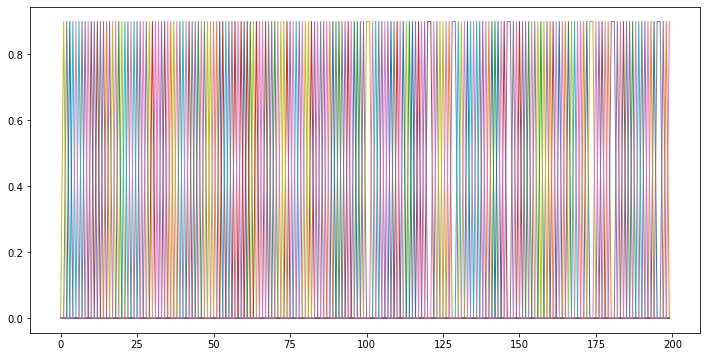

In [5]:
letters = 27
data = fileToVector("training.txt", letters) * 0.9

printShape(data)
plt.figure(figsize=(12, 6))
plt.plot(range(0, 200), data.squeeze()[:200], linewidth=1)
plt.show()


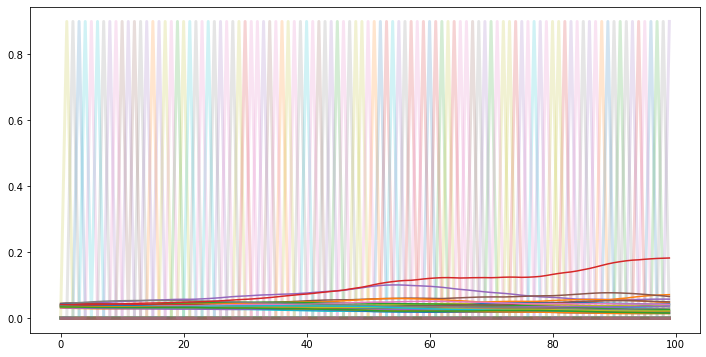

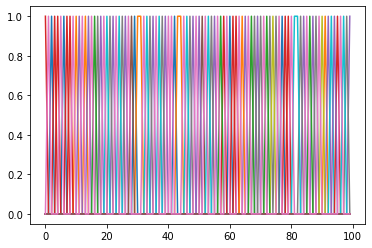

D AND AND BE BE WHE THE THE ZALL THE THE QALL THE OF THE WD AND LE WHER WHIH AND TTHE WOR SBEJON THE TARD XOR THE T LL IN THEY WHER JAZL TO AND LE WHER BARD THER EN THILT WHER BE RATHE TO SEUS T NOLL THE XITTARD THE HOR BE WHE DED THE ON THE AND BE THE WARD WH COR WHE WH LAD THE WATT AND THE AND WH THE MALLONG HAD TO UN AND WHER TH KE ENT ALL WO LILL WHER WHKD AND THE REER THE THE WER AND WHED WHER THE NAS THE THE ZAS THE THE LALL WHER WHILL TE AND THE BE AND BARD NEE RAS AND TH WHE BE WHER NAER OULD THE THE S WO THE ON THE AND THE ON THE WER OF THE KOJJALLEE THE S WHER THE LICH TE E OL THE IN TARD THE WIRD THE ARD AND AND THE COASING AND AND THE BT THE THE NALL THE RILL THE JAON IN THE WARD THE  AND AND G AND WH THE MAUS  ALR AND LAD THE THE WAS NLOOD AND TO IN AND AND THE WHER THE  NEER THE HOR BE  NEED AND WHER THE LAD AND SE AND THIS  THE RAINT AMD WH AND THE BE WHE VE SEE LL AND WHIS  DER IN THE THE BE AND THE THE ON THE UN THE BAD TO BE ON WHE ME AND WES WOR BE DER WO SET THE XAS

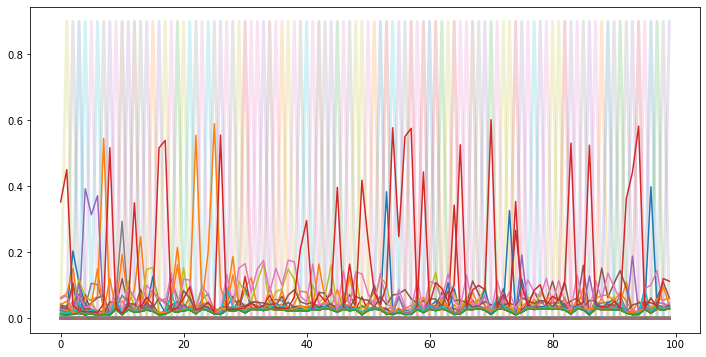

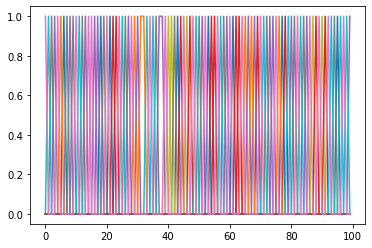

 THE LAHER THE QEOAR AND THE BELLT THEE SIRAD IN THE AND THE AND BEVED THEY VADTER THE IN IN THAT TERE AND THE JON HED SSEING THE AND BEAD THE AND THE RETXER SSORUED THE RA W THE ONTALL BELLER NILLER WHJOR THE SARS WHED THALD AND BED THE AND IN THE NEH OF TTAR SELD WIXH ON THE BARNED BELLED THE SCOAD THE BELLED THNAER AND THE ANRED THE YOREED NELLED THE AND THE BEARZER AND WHILL THE ANLE THE WARLE THE SSGIND THE WINGER THE WARGER WHIND THE FORT THE SEELLLED OF THE BADXAD THE WARLE COMINGER THE REEALD BELED THAD THE WARLE NOLD THE WINGTT THE AND THE THE SSPOMAND THE FARE THE WARLM WHION BET THE RAAND SAAAD OF BED TWING OF THE WARE THE HARLE KENS SELE THE HER SE W ON THE MAQTARD FOR ONDAND AD ALL TTTHER WITTTT MERS THE WIRH TO WING KED WERE THE JONND OF THE SAST COMAND AND IN THE BALL OF THE THIAN TTER BEACING THE BEER THAR AND THE REALLER THE TOLLER SENT AND THE AND AND THE SAAHD THE REMAND WHARD WILD IN THE BARELD AND THE LEPLH WERE HAD AND WHER THE AND THE WIND THTER RELLLT THE WORE W

In [ ]:
batchSize = 1
epochs = 100
plotRate = 1
printRate = 1000000
learnRate = 0.001
network = Network(batchSize, learnRate)
network.addLayer(letters, 80)
network.addLayer(80, 70)
network.addLayer(70, 40)
network.addLayer(40, letters)
answers = []

for e in range(0, epochs):
    network.clearMemory()
    for i in range(0, len(data)-1):
        if (e*len(data) + i + 1) % printRate == 0:
            print("---EPOCH " + str(e) + " , SAMPLE " + str(i) + "-----------------")
            print("Forward pass:" + str(network.forwardPass(data[i])))
            print("Truth: " + str(data[i+1]))
        else:
            network.forwardPass(data[i])
        network.error(data[i+1])
        if e % plotRate == 0:
            answers.append(network.layers[-1].H[-1].squeeze())
        if (e*len(data) + i + 1) % batchSize == 0:
            if (e*len(data) + i + 1) % printRate == 0:
                print("                          Backprop: " + str(network.backprop(e*len(data) + i + 1)))
            else:
                network.backprop(e*len(data) + i + 1)
    if e % plotRate == 0:
        plt.figure(figsize=(12, 6))
        plt.plot(range(0, min(len(data), 100)), data.squeeze()[0:100], linewidth=3, alpha=0.2)
        plt.plot(range(0, min(len(data), 100)), answers[:100])
        plt.show()
        answers = []
        prevAns = network.layers[-1].H[-1]
        maxElement = np.argmax(network.layers[-1].H[-1])
        prevAns.fill(0)
        prevAns[maxElement][0] = 1
            
        for s in range(0, 1000):
            prevAns = network.forwardPass(prevAns)
            answers.append(prevAns.squeeze())
            maxElement = getWeightedMax(prevAns.squeeze(), 2.2)
            prevAns.fill(0)
            prevAns[maxElement][0] = 1
            
            
        plt.plot(range(0, 100), answers[:100])
        plt.show()
        print(vectorToLetter(answers, letters))
        answers = []
        